# CSE 6240 Web Search and Text Mining
## Homework 4: Graph Convolution Network [10 points]

This homework asks you to build Multilayer perceptron(MLP) and Graph convolution network(GCN), and compare the performance on 2 graph related tasks. 

- The first is node classification where given a graph with some nodes labelled, you need to find the labels of the unlabelled nodes

- The second is graph classification, where given a graph and a class it belongs to, you need to classify the graph. A classic example of this task is drug discovery

Please read the following statement and abide by it. Please run the following cell substituting your student and user names to agree. 

In [2]:
def author_honor_code (student_name='Jiarui_Xu', user_name='jxu605'):
  print (f'I, {student_name} ({user_name}), state that I performed the tasks in this assignment following the Georgia Tech honor code(https://osi.gatech.edu/content/honor-code).')

# print the honor code before submission (substitute your name and username)
author_honor_code (student_name="Jiarui_Xu", user_name="jxu605")

I, Jiarui_Xu (jxu605), state that I performed the tasks in this assignment following the Georgia Tech honor code(https://osi.gatech.edu/content/honor-code).


In [3]:
import torch
print(torch.__version__)

1.10.0+cu111


## Install pytorch geometric

In [4]:
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-1.10.0+cpu.html

Looking in links: https://data.pyg.org/whl/torch-1.10.0+cpu.html
     |████████████████████████████████| 291 kB 2.2 MB/s 
     |████████████████████████████████| 639 kB 23.5 MB/s 
     |████████████████████████████████| 328 kB 54.4 MB/s 
     |████████████████████████████████| 138 kB 52.7 MB/s 
     |████████████████████████████████| 370 kB 5.0 MB/s 
     |████████████████████████████████| 482 kB 50.6 MB/s 
     |████████████████████████████████| 41 kB 606 kB/s 
  Created wheel for torch-geometric: filename=torch_geometric-2.0.3-py3-none-any.whl size=581968 sha256=3302c0e6044249af5ac6b251d4bfa18e631664263c2c2c7d0ae8c02cf7e06734
  Stored in directory: /root/.cache/pip/wheels/c3/2a/58/87ce0508964d4def1aafb92750c4f3ac77038efd1b9a89dcf5
Successfully built torch-geometric


In [5]:
## Test installation
import torch_geometric

# Section 1: Pytorch Geometric Datasets (0.3 pts)

In this section, we will load the citation network data 'Citeseer'. The following cell will download the network in your current directory. Then, we are going to check the number of classes and features in the dataset.

### Data Loading: Citeseer network


In [6]:
from torch_geometric.datasets import Planetoid

# Checkout the documentation https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets.Planetoid
# for more details about the dataset

name = 'Citeseer'
pyg_dataset= Planetoid('./', name)


Processing...
Done!


## 1.1 Print the number of classes and features in the Citeseer dataset (0.2 pts)

In [7]:
def get_num_classes(pyg_dataset):
  # Implement a function that takes a pytorch geometric dataset object
  # and returns the number of classes for that dataset.

  num_classes = None

  ### write your code below [0.1 points] ##
  num_classes=pyg_dataset.num_classes
  
  #########################################

  return num_classes

def get_num_features(pyg_dataset):
  # Implement a function that takes a pytorch geometric dataset object
  # and returns the number of features for that dataset.

  num_features = None

  ### write your code below [0.1 points] ##
  num_features=pyg_dataset.num_features
  
  #########################################

  return num_features

In [37]:
# This is for sanity check. The output of the second line should be True if your code is correct.

print(f"Number of classes in Citeseer: {get_num_classes(pyg_dataset)}. Sanity check: {get_num_classes(pyg_dataset)==6}")
print(f"Number of features per node in Citeseer: {get_num_features(pyg_dataset)}. Sanity check: {get_num_features(pyg_dataset)==3703}")

Number of classes in Citeseer: 6. Sanity check: True
Number of features per node in Citeseer: 3703. Sanity check: True


## 1.2 Get the class label of a given node (via the index) (0.1 pts)

In [38]:
def get_class(pyg_dataset, idx) -> int:
  # Implement a function that takes a pytorch geometric dataset object,
  # an index of a node within the dataset, and returns the class/label 
  # of the node (as an integer).

  label = -1

  ### write your code below [0.1 points] ##
  labels=pyg_dataset[0].y
  label=labels[idx]
  #########################################
  return label


In [39]:
# This is for sanity check. The output of the second line should be True if your code is correct.
indices = [0, 13, 235, 73, 3326, 1537]
labels = [3, 1, 2, 5, 5, 3]
for idx, label in zip(indices,labels):
  print(f"Class label of node idx {idx} is {get_class(pyg_dataset, idx)}  \t{get_class(pyg_dataset, idx)==label}")

Class label of node idx 0 is 3  	True
Class label of node idx 13 is 1  	True
Class label of node idx 235 is 2  	True
Class label of node idx 73 is 5  	True
Class label of node idx 3326 is 5  	True
Class label of node idx 1537 is 3  	True


# Section 2: Node classification task (5.9 pts)


In this section, we will perform node classfication on the Citeseer dataset. As an initial step, we need to implement a two-layer MLP model. After that, we will implement and use a two-layer GCN model. Finally, we will compare the performance between the MLP and GCN models.

In [6]:
from torch_geometric.datasets import Planetoid
dataset = pyg_dataset
data = dataset[0]

## 2.1 MLP for node classification

### 2.1.1 Accessing the train, val and test nodes (0.1 pts)

In [7]:
train_mask = None
test_mask = None
val_mask = None

### write your code below [0.1 points] ##
train_mask=data.train_mask
test_mask = data.test_mask
val_mask = data.val_mask

#########################################

print(f"Number of train nodes: {train_mask.sum()}\t Sanity Check: {120 == train_mask.sum()}")
print(f"Number of train nodes: {val_mask.sum()}\t Sanity Check: {500 == val_mask.sum()}")
print(f"Number of train nodes: {test_mask.sum()}\t Sanity Check: {1000 == test_mask.sum()}")


Number of train nodes: 120	 Sanity Check: True
Number of train nodes: 500	 Sanity Check: True
Number of train nodes: 1000	 Sanity Check: True


### 2.1.2 Define a two layer MLP to do node classification (0.5 pts)

Implement a two layer MLP with hidden dimension size as 16 and train the model on the dataset. We want to use ReLU activation and dropout with p = 0.2


In [8]:
import torch
from torch.nn import Linear
import torch.nn.functional as F

hidden_channels = 16
dropout_probability = 0.2

class MLP(torch.nn.Module):
    def __init__(self, dataset, hidden_channels):
        super().__init__()
        torch.manual_seed(12345) # DO NOT CHANGE THIS SEED VALUE. THIS ENSURES REPRODUCIBILITY.
        """
        Use the constructor to initialize the layers of the network. In this case 2 linear layers
        Read more about Linear layers in PyTorch here: https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#linear
        """

        self.lin1 = None 
        self.lin2 = None

        # Step 1. The first linear layer (self.lin1) should convert the input features to hidden dimension size which will then be fed into self.lin2
        # Step 2. The second linear layer (self.lin2) should convert the output of self.lin1 to output dimension (number of classes/labels in our case)

        ### write your code below [0.2 points] ##
        self.lin1=Linear(dataset.num_features,hidden_channels)
        self.lin2=Linear(hidden_channels,dataset.num_classes)

        #########################################


    def forward(self, data):
        # Step 1. Extract node features and target labels from data
        # Step 2. Call the first linear layer (self.lin1)
        # Step 3. The output of the linear layer should be passed through a ReLU non-linearity
        # Step 4. Apply dropout with dropout probability p=dropout_probability 
        # Step 5: Apply the second linear layer and return the output

        ### write your code below [0.3 points] ##
        labels=data.y
        features=data.x
        output=self.lin1(features)
        relu=torch.nn.ReLU()
        output=relu(output)
        output=F.dropout(output,p=dropout_probability,training=self.training)
        out=self.lin2(output)

        #########################################
        return out

mlp_model = MLP(dataset, hidden_channels=hidden_channels)

## Print the model and double check that you have implemented the correct MLP
print(mlp_model)

MLP(
  (lin1): Linear(in_features=3703, out_features=16, bias=True)
  (lin2): Linear(in_features=16, out_features=6, bias=True)
)


### 2.1.3 Implement evaluate_accuracy (1 pt)

#### Instructions to implement evaluate_accuracy

1. For this task, we will be using the standard accuracy metric which captures **`total_correct_predictions / total_predictions`** 
2. Accuracy should be calculated using the **test** nodes in dataset. Compute predictions for each node, and use the **predictions along with ground truth (y)** to get the accuracy value

Other metrics can be used, such as F1 and AUC, but we will restrict ourselves to accuracy as part of this homework.

In [9]:
# In this block, you will implement the following utility function to evaluate the accuracy of the trained MLP and GCN models.

def evaluate_accuracy(model, data):
      """
      Inputs to this method are the model object (nn.Module) and the graph data object
      """
      model.eval()
      test_acc = None # Assign your final answer (accuracy) to this variable

      # Step 1: Run forward pass on the entire data
      # Step 2: Convert the prediction logit outputs given by model to prediction classes via argmax (i.e. assign predicted class as the class with the highest prediction logit)
      # Step 3: Extract the predictions of the test dataset. Use one of test_mask, train_mask, or val_mask
      # Step 4: Extract the ground truth labels of the test dataset. Use one of test_mask, train_mask or val_mask
      # Step 5: Use predicted class and ground truth class of test nodes to compute accuracy
      # To calculate accuracy use the following formula ""Accuracy = (number of correct predictions in the test set / size of test set)""
      
      ### write your code below [1.0 points] ##
      out=model.forward(data)
      predict_class=torch.argmax(out,dim=1)
      predict_test=predict_class[data.test_mask]
      truth_labels=data.y[data.test_mask]
      differ=predict_test-truth_labels
      test_acc=len(differ[differ==0])/len(predict_test)
      #########################################

      return test_acc

### 2.1.4 Train the MLP on the dataset (0.5 pts)


- In this section you will train the MLP defined above and evaluate it's performance

#### GOAL: Obtain a minimum accuracy of 58% on the test set

In [10]:
# Having implemented the model architecture and a helper function to evaluate performance, we will now train the model.
# Training a neural network involves performing iterative optimization via gradient descent until convergence. 
# The method train() below will be called repeatedly in the next code block to run training on the dataset. 

# Hyperparameters of the model. DO NOT CHANGE.
lr = 0.1 # learning rate, also called step size sometimes
wd = 1e-4 # Weight decay, regularization parameter (ensures that we don't overfit to the training data)

criterion = None
optimizer = None

# Step 1: Initialize criterion using the cross entropy loss function
# Step 2: Initialize Optimizer. Use SGD with a learning rate = lr and weight decay = wd

### write your code below [0.1 points] ##
criterion=torch.nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(mlp_model.parameters(), lr=lr, weight_decay=wd)

#########################################


def train(data):
      mlp_model.train()
      optimizer.zero_grad()

      # Step 1: Run forward pass on the entire graph 
      # Step 2: Extract only the training nodes from the graph. Use one of test_mask, train_mask, or val_mask
      # Step 3: Compute the loss between model output and labels of training nodes and store it in train_loss
      # Step 4: Extract only the validation nodes from the graph. Use one of test_mask, train_mask, or val_mask
      # Step 5: Compute the loss between model output and labels of validation nodes and store it in val_loss
      # Step 6: Calculate the gradients using only the train_loss
      # Step 7: Once gradients have been calculated, update the model parameters using the optimizer defined above

      ### write your code below [0.4 points] ##
      out=mlp_model.forward(data)
      training_nodes=data.y[data.train_mask]
      train_loss=criterion(out[data.train_mask],training_nodes)
      validation_nodes=data.y[data.val_mask]
      val_loss=criterion(out[data.val_mask],validation_nodes)
      train_loss.backward()
      optimizer.step()
      #########################################

      return train_loss.item(), val_loss.item()

### 2.1.5 Training Loop (0.3 pts)

In [11]:
# In this section, you will train the MLP network with the appropriate hyperparameters for num_epochs. 
# A template of the training loop is given. Fill the code in the codeblock as per instruction and run training!

num_epochs = 300 # This is a hyperparameter. Do not change. 

training_loss = []
validation_loss = []
for epoch in range(1, num_epochs+1):
    # Step 1: Call the train function on your dataset and store the returned values train_loss and val_loss
    # Step 2: Append the train_loss and validation_loss to the respective lists. 
    #         We will plot the training curves later using train_loss and validation_loss lists. 
    
    ### write your code below [0.3 points] ##
    train_loss, val_loss=train(data)
    training_loss.append(train_loss)
    validation_loss.append(val_loss)


    #########################################

    # Print loss values every 10 epochs
    if epoch%10 == 0:
      print(f'Epoch: {epoch:03d}, Training Loss: {train_loss:.4f} Validation Loss: {val_loss:.4f}')

Epoch: 010, Training Loss: 1.7680 Validation Loss: 1.8296
Epoch: 020, Training Loss: 1.7160 Validation Loss: 1.8039
Epoch: 030, Training Loss: 1.6336 Validation Loss: 1.7747
Epoch: 040, Training Loss: 1.5448 Validation Loss: 1.7389
Epoch: 050, Training Loss: 1.4291 Validation Loss: 1.7024
Epoch: 060, Training Loss: 1.2917 Validation Loss: 1.6429
Epoch: 070, Training Loss: 1.1402 Validation Loss: 1.6061
Epoch: 080, Training Loss: 0.9412 Validation Loss: 1.5491
Epoch: 090, Training Loss: 0.8205 Validation Loss: 1.4957
Epoch: 100, Training Loss: 0.6445 Validation Loss: 1.4525
Epoch: 110, Training Loss: 0.5418 Validation Loss: 1.4389
Epoch: 120, Training Loss: 0.4608 Validation Loss: 1.4008
Epoch: 130, Training Loss: 0.3989 Validation Loss: 1.3490
Epoch: 140, Training Loss: 0.3667 Validation Loss: 1.3764
Epoch: 150, Training Loss: 0.3129 Validation Loss: 1.3571
Epoch: 160, Training Loss: 0.2962 Validation Loss: 1.3465
Epoch: 170, Training Loss: 0.2182 Validation Loss: 1.3442
Epoch: 180, Tr

### Plotting the loss curves!

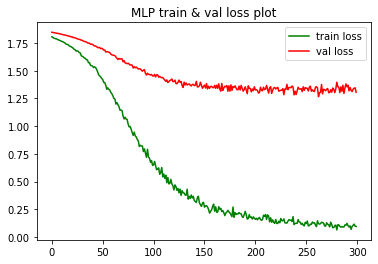

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(training_loss)), training_loss, color='green', label='train loss')
plt.plot(range(len(validation_loss)), validation_loss, color='red', label='val loss')
plt.legend()
plt.title("MLP train & val loss plot")
plt.show()

### 2.1.6 Evaluate accuracy of the trained mlp_model (0.1 pts)

In [13]:
# Use the trained MLP model, dataset and the evaluate_accuracy method you implemented to calculate the final accuracy of the trained model.
test_acc = None
### write your code below [0.1 points] ##
test_acc=evaluate_accuracy(mlp_model, dataset[0])

#########################################

print(f'Test Accuracy of the trained MLP model is : {test_acc:.4f}')
print(f"MLP model accuracy sanity check: {test_acc > 0.58}")

Test Accuracy of the trained MLP model is : 0.6020
MLP model accuracy sanity check: True


## 2.2 GCN for node classification

### 2.2.1 Define GCN architecture (0.5 pts)

- Implement a 2 layer GCN using constructs from Pytorch Geometric





In [14]:
import torch.nn as nn
import torch.nn.functional as F

# Note: You will be using the GCNConv to implement a graph convolution layer
from torch_geometric.nn import GCNConv 

# Hyperparameters of the model. DO NOT CHANGE.
hidden_channels = 16
dropout_probability = 0.2

# Implement a GCN model with 2 GCNConv layers with ReLU non-linearity and dropout
class GCN(nn.Module):
    def __init__(self, dataset, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(98765) # Set a seed so that you can reproduce your results
        self.dataset = dataset
        self.conv1 = None
        self.conv2 = None

        # Step 1: Input to the first convolutional layer would be the node features and output = hidden dimension size
        # Step 2: Input to the second convolution layer would be hidden dimension size and output would be number of classes in the dataset
        
        ### write your code below [0.2 points] ##
        self.conv1=GCNConv(dataset.num_features,hidden_channels)
        self.conv2=GCNConv(hidden_channels,dataset.num_classes)

        #########################################

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        # Step 1: Using the node features and the edge_index, compute intermediate representation via the first GCNConv layer
        # Step 2: Apply the ReLU non-linearity on the output of self.conv1
        # Step 3: Apply dropout
        # Step 4: Pass the output of step 3 through the second convolutional layer to get output logits 
        # Step 5: The outputs of the network are raw unnormalized values called logits. 
                  # For the loss function, will apply log_softmax on the logits and minimize that. 
                  # log_softmax works as follows: softmax converts raw logits into probabilities and we minimize the log of softmax. 

        ### write your code below [0.3 points] ##
        x=self.conv1(x,edge_index)
        relu=torch.nn.ReLU()
        x=relu(x)
        x=F.dropout(x,p=dropout_probability,training=self.training)
        out=self.conv2(x,edge_index)
        #########################################

        return out

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

gcn_model = GCN(dataset, hidden_channels=hidden_channels)
print(gcn_model)


GCN(
  (conv1): GCNConv(3703, 16)
  (conv2): GCNConv(16, 6)
)


### 2.2.2 GCN Training (0.5 pts)

- Train the GCN network developed above and evaluate it's accuracy

In [15]:
optimizer = None
Criterion = None

# Hyperparameters of the model. DO NOT CHANGE.
lr=1e-1
weight_decay=1e-4

# Step 1: Initialize criterion using the cross entropy loss function
# Step 2: Initialize Optimizer. Use SGD with the above initial learning rate and weight decay

### write your code below [0.1 points] ##
criterion=torch.nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(gcn_model.parameters(), lr=lr, weight_decay=weight_decay)

#########################################

def train(data):
      gcn_model.train() #Set model to training mode
      optimizer.zero_grad()

      # Step 1: Perform forward pass on the entire data object
      # Step 2: Extract the training nodes and labels
      # Step 3: Compute loss using criterion (defined above) on the training nodes and labels and store in train_loss variable
      # Step 4: Compute loss using criterion (defined above) on the validation nodes and labels and store in val_loss variable
      # Step 5: Calculate the gradients using only the train_loss
      # Step 6: Once gradients have been calculated, update the model parameters using the optimizer

      ### write your code below [0.4 points] ##
      out=gcn_model.forward(data)
      training_nodes=data.y[data.train_mask]
      train_loss=criterion(out[data.train_mask],training_nodes)
      validation_nodes=data.y[data.val_mask]
      val_loss=criterion(out[data.val_mask],validation_nodes)
      train_loss.backward()
      optimizer.step()

      #########################################
      
      return train_loss.item(), val_loss.item()


### 2.2.3 Training Loop for GCN (0.3 pts)

In [16]:
# Similar to the training loop for MLP, you will now implement a training loop for the GCN model
num_epochs = 200

gcn_training_loss = []
gcn_validation_loss = []
for epoch in range(1, num_epochs+1):
  
    # Step 1: Call the train function on your dataset and store the returned values train_loss, and val_loss
    # Step 2: Append the train_loss and val_loss to the respective lists. We will plot the training curves in the next section. 
    
    ### write your code below [0.3 points] ##
    train_loss, val_loss=train(dataset[0])
    gcn_training_loss.append(train_loss)
    gcn_validation_loss.append(val_loss)

    #########################################


    # Print loss values every 10 epochs 
    if epoch % 10 == 0:
      print(f'Epoch: {epoch:03d}, Training Loss: {train_loss:.4f} Validation Loss: {val_loss:.4f}')

Epoch: 010, Training Loss: 1.7202 Validation Loss: 1.7643
Epoch: 020, Training Loss: 1.6190 Validation Loss: 1.7165
Epoch: 030, Training Loss: 1.5123 Validation Loss: 1.6651
Epoch: 040, Training Loss: 1.4019 Validation Loss: 1.6031
Epoch: 050, Training Loss: 1.2747 Validation Loss: 1.5500
Epoch: 060, Training Loss: 1.1568 Validation Loss: 1.4870
Epoch: 070, Training Loss: 1.0467 Validation Loss: 1.4093
Epoch: 080, Training Loss: 0.9106 Validation Loss: 1.3521
Epoch: 090, Training Loss: 0.8492 Validation Loss: 1.2988
Epoch: 100, Training Loss: 0.7267 Validation Loss: 1.2459
Epoch: 110, Training Loss: 0.6538 Validation Loss: 1.1945
Epoch: 120, Training Loss: 0.5862 Validation Loss: 1.1724
Epoch: 130, Training Loss: 0.5142 Validation Loss: 1.1143
Epoch: 140, Training Loss: 0.4824 Validation Loss: 1.0829
Epoch: 150, Training Loss: 0.4254 Validation Loss: 1.0772
Epoch: 160, Training Loss: 0.3888 Validation Loss: 1.0275
Epoch: 170, Training Loss: 0.3437 Validation Loss: 1.0419
Epoch: 180, Tr

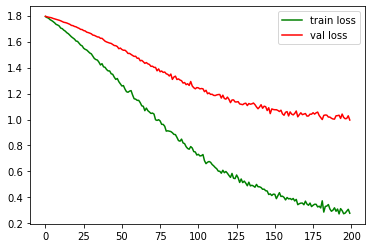

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(gcn_training_loss)), gcn_training_loss, color='green', label='train loss')
plt.plot(range(len(gcn_validation_loss)), gcn_validation_loss, color='red', label='val loss')
plt.legend()
plt.show()

### 2.2.4 Evaluate the accuracy of the trained GCN (0.2 pts)

In [18]:
# Use the trained GCN model, dataset and the evaluate_accuracy method you implemented to calculate the final accuracy of the trained model
# If all the functions are implemented correctly, you should obtain a test accuracy > 70%. 
gcn_test_acc = None
### write your code below [0.2 points] ##
gcn_test_acc=evaluate_accuracy(gcn_model, dataset[0])

#########################################

print(f'Test Accuracy of the trained GCN model is : {gcn_test_acc:.4f}')
print(f"GCN model accuracy sanity check: {gcn_test_acc > 0.70}")

Test Accuracy of the trained GCN model is : 0.7100
GCN model accuracy sanity check: True


## Textual Question (1 pts)

### A. How does the GCN perform when compared to the MLP?  [0.5 pts]
#### Consider the following questions while answering A
- What would the performance of a random classifier be? 
- How does the performance of MLP compare to that of the random classifier? 
- How does the performance of GCN compare to that of the random classifier? 
- How does the performance of GCN compare to that of the MLP?

### B. Explain your understanding of why the GCN performs better or worse than a MLP in a few sentences [0.5 pts]
#### Answer the above question by considering the follow up questions listed below 
- Consider the inductive biases used by the linear vs GCN layer.
- Does the GCN layer use the graph neighbourhood information? Does the linear layer use the graph neighbourhood information? 
- Does using the graph information help the learning problem?  

#### Note that we are not looking for long answers but answers that are crisp and capture your understanding of the results.

Answer to A: 
A random classifier will have 1/n accuracy.(n is the number of classes.)n, in this case, is 6, so the accuracy of a random classifier is 1/6=0.1667. The performance of MLP is about 0.6, which is much better than random classifier. The performance of GCN is about 0.7 which is also much better than random classifier. GCN's performance is better than MLP's because GCN's accuracy is 10% higher than MLP's.

Answer to B: GCN and MLP share the weights(biases) for every node. However, GCN use graph neighbourhood information while MLP treat each node as individual and independant distributed. It turns out that graph information(neighbour information) really helps because GCN preforms better than MLP.

## 2.3 Visualize embedddings from MLP and GCN networks

### [Helper function - tSNE] Visualize the tsne plot for the embeddings obtained via MLP and GCN networks

## DO NOT edit the TSNE function. 

In [19]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

#### NOTE ####
# - TSNE is a non-linear dimensionality reduction technique used to visualize high dimensional data
# - The input to the visualize function are the high dimensional embeddings
# - As part of the visualization, we would like to see how the data points cluster based on the class label
# - Hence, for the color parameter we'll pass the number of classes so that each class is colored differently
#### END NOTE ####


def visualize(embeddings, color):
    z = TSNE(n_components=2).fit_transform(embeddings.detach().cpu().numpy())

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()


Below, we have provided snippet to visualize the embeddings of the trained MLP model

- Run the cell, to visualize how the relationship between embeddings of different classes

- In the output produced, each dot is a data point and data points of different classes are colored differently


### 2.3.1 TSNE visualization of embeddings generated by the MLP model (0.2 pts)

- Run the cell, to visualize how the relationship between embeddings of different classes

- In the output produced, each dot is a data point and data points of different classes are colored differently


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


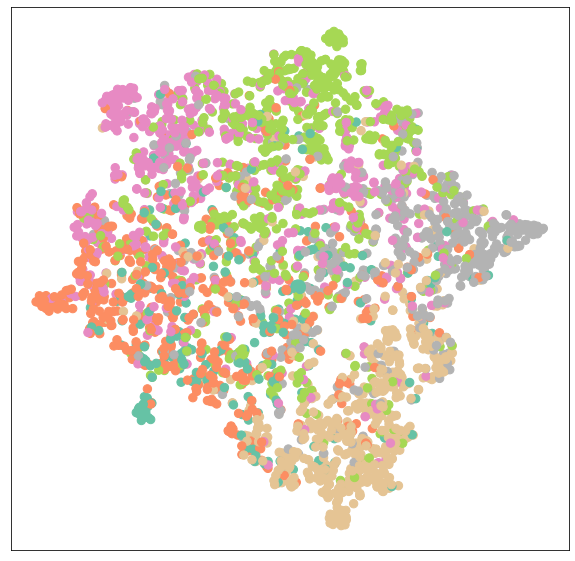

In [20]:
# In this section, you will visualize the embeddings generated by the MLP model in 2D

# Step 1: Set the model to evaluation model. We do this because dropout behaves differently in train/eval modes. 
# Step 2: Run forward pass on the mlp model and collect the embeddings in the variable out

out = None
### write your code below [0.2 points] ##
mlp_model.eval()
out=mlp_model.forward(data)

#########################################

visualize(out, color=data.y)

### 2.3.2 TSNE visualization of embeddings generated by the GCN model (0.2 pts)

- Run the cell, to visualize how the relationship between embeddings of different classes

- In the output produced, each dot is a data point and data points of different classes are colored differently


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


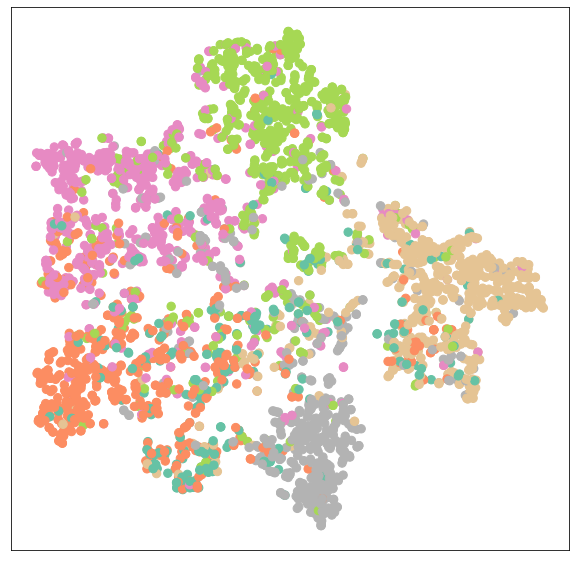

In [21]:
# In this section, you will visualize the embeddings generated by the GCN model in 2D

# Step 1: Set the model to evaluation model. We do this because dropout behaves differently in train/eval modes. 
# Step 2: Run forward pass on the gcn model and collect the embeddings in the variable out. 

### write your code below [0.2 points] ##
gcn_model.eval()
out=gcn_model.forward(data)

#########################################

visualize(out, color=data.y)

### 2.3.3 Compare the TSNE plots between MLP and GCN (0.5 pts)
- A: Which model shows the clear classification according to the label? (0.25 pts)
- B: What does this tell you about node embedding projected by MLP and GCN for node classification task (0.25 pts)

Answer to A: Obviously, GCN shows clear classfication according to the label.

Answer to B: Using GCN to project node embedding will make it easier to classified than MLP.

# Section 3 - Graph Classification (3.8 pts)

Graph classification refers to classifiying entire graphs (in contrast to nodes), given a dataset of graphs, based on some structural graph properties. The goal of this section is to embed entire graphs in a way that they are linearly separable given a task like binary graph classification

This is an extremely useful task used extensively in many applications, most notably in molecular biology and drug discovery.



## Loading the dataset for graph classification 

In this section, we will change our dataset to 'ENZYMES'. The following cell will download the network in your current directory.

In [8]:
from torch_geometric.data import DataLoader
from torch_geometric.datasets import TUDataset
from tqdm.notebook import tqdm

name = 'PROTEINS'
enzymes_dataset = TUDataset('./', name)

# You will find that there are 1113 graphs in this dataset
print(len(enzymes_dataset))

Extracting ./PROTEINS/PROTEINS.zip
Processing...


1113


Done!


Splitting the dataset. We will use the first 900 graphs as train data and the remaining as test data. To ensure deterministic outputs, we set the seed before shuffling the data points

In [9]:
torch.manual_seed(12345) # DO NOT CHANGE THE SEED FOR REPRODUCIBILITY.
dataset = enzymes_dataset.shuffle()

train_dataset = dataset[:900] # DO NOT CHANGE. 
test_dataset = dataset[900:] # DO NOT CHANGE. 

print(f'Number of training graphs: {len(train_dataset)}')
print(f'Number of test graphs: {len(test_dataset)}')


Number of training graphs: 900
Number of test graphs: 213


## 3.1 - Mini batching of graphs (0.5 pts)

- In the earlier section since we had a single graph, we didn't really need to batch the data, we just passed the entire num_nodes x num_features along with the edge_list

- For this section, you will implement BATCHING so that we can process multiple graphs at once

- Use a batch size of 32 for both train and test dataloaders

In [10]:
from torch_geometric.loader import DataLoader

# In the previous task (node classification), a single data point was a node and the entire dataset was one single graph.
# But in this graph, a single data point is a graph and the entire dataset is 1113 graphs. 
# So it makes sense for us to batch the data (much like how we batch images), to make sure that we're computationally efficient. 
# In the above block we have loaded the train_dataset and test_dataset. Using the DataLoader (imported) to batch the data. 
# Use a batch size of 32, i.e. we will be able to process 32 graphs at once, using the batched data instead of 1 graph, leading to speed up. 

train_loader = None
test_loader = None
bs = 32

# Step 1: Use the DataLoader function to convert train_dataset and test_dataset into train_loader and test_loader.
# Make sure to set shuffle=True, so that across epochs the network does not learn the ordering of the datapoints to perform better, but is able to generalize. 

### write your code below [0.5 points] ##
train_loader=DataLoader(train_dataset,batch_size=bs,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=bs)

#########################################

# Printing the batches created for your inspection
for step, data in enumerate(train_loader):
    print(f'Step {step + 1}:')
    print('=======')
    print(f'Number of graphs in the current batch: {data.num_graphs}')
    print(data)
    print()

Step 1:
Number of graphs in the current batch: 32
DataBatch(edge_index=[2, 4082], x=[1160, 3], y=[32], batch=[1160], ptr=[33])

Step 2:
Number of graphs in the current batch: 32
DataBatch(edge_index=[2, 3998], x=[1090, 3], y=[32], batch=[1090], ptr=[33])

Step 3:
Number of graphs in the current batch: 32
DataBatch(edge_index=[2, 4324], x=[1108, 3], y=[32], batch=[1108], ptr=[33])

Step 4:
Number of graphs in the current batch: 32
DataBatch(edge_index=[2, 3436], x=[953, 3], y=[32], batch=[953], ptr=[33])

Step 5:
Number of graphs in the current batch: 32
DataBatch(edge_index=[2, 4964], x=[1323, 3], y=[32], batch=[1323], ptr=[33])

Step 6:
Number of graphs in the current batch: 32
DataBatch(edge_index=[2, 4084], x=[1086, 3], y=[32], batch=[1086], ptr=[33])

Step 7:
Number of graphs in the current batch: 32
DataBatch(edge_index=[2, 8252], x=[2183, 3], y=[32], batch=[2183], ptr=[33])

Step 8:
Number of graphs in the current batch: 32
DataBatch(edge_index=[2, 4284], x=[1176, 3], y=[32], bat

## 3.2 - Implementing a GCN for graph classification (2 pt)

- A salient difference between the previous section and this one is that for this section you need to compute GRAPH level features as opposed to NODE level features

- You will use graph convolutional layers along with graph pooling to obtain graph level embeddings

In [11]:
# In this section, we ask you to define a network architecture to compute Graph-level features. Recall that in the previous section, you used node features.
# The process is same as the GCN you implemented earlier with one key change. We need to aggregate the node level features into a graph level feature. 

from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

# For pooling, we will use global mean pooling.
from torch_geometric.nn import global_mean_pool

# Initiliaze hyperparameters. DO NOT CHANGE. 
hidden_channels = 64
dropout_probability = 0.2

class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(12345) # DO NOT CHANGE SEED. 
        self.conv1 = None 
        self.conv2 = None 
        self.classifier = None 

        # Step 1: Initialize self.conv1 using GCNConv input feature dimensions and output as hidden dimension size
        # Step 2: Initiliaze self.conv2 using GCNConv dimension size as hidden dimension size and output size as hidden dimension size again
        # Step 3: Initialize self.classifier using Linear layer with input size same as the shape as the output of previous layer (hidden dimension size) 
        #         and output size as number of classes
        ### write your code below [0.5 points] ##
        self.conv1=GCNConv(dataset.num_features,hidden_channels)
        self.conv2=GCNConv(hidden_channels,hidden_channels)
        self.classifier=Linear(hidden_channels,dataset.num_classes)

        #########################################

    def forward(self, x, edge_index, batch):

        # GET NODE EMBEDDINGS
        # Step 1: Obtain node embeddings using the following steps: self.conv1 -> ReLU -> self.conv2
        ### write your code here [0.3 points] ##
        x=self.conv1(x,edge_index)
        relu=torch.nn.ReLU()
        x=relu(x)
        x=self.conv2(x,edge_index)

        #########################################

        # POOLING
        # Step 2: Pass the output of the the node embeddings to the global_mean_pool function to get the graph level embeddings
        ### write your code here [0.5 points] ##
        x=global_mean_pool(x,batch)

        #########################################

        # CLASSIFICATION
        # Step 3: Apply dropout with probability = dropout_probability (ensure that dropout is in train mode)
        # Step 4: Pass the output to self.classifier to obtain final logits   
        ### write your code here [0.7 points] ##
        x=F.dropout(x,p=dropout_probability,training=self.training)
        out=self.classifier(x)

        #########################################
        
        return out

GCNmodel = GCN(hidden_channels=hidden_channels)
print(GCNmodel)

GCN(
  (conv1): GCNConv(3, 64)
  (conv2): GCNConv(64, 64)
  (classifier): Linear(in_features=64, out_features=2, bias=True)
)


## 3.3 Training for the graph classification task (0.5 pts)

In [16]:
# Having defined the GCN architecture for graph classification, in this block you will setup the train() function. 
# The train function represents one "epoch" of training, i.e the model having seen all the train data exactly once.
# You will call the train() function repeatedly later to train the network. 

import numpy as np
import torch

# Initialize hyperparameters. Do not change. 
lr=1e-1
weight_decay=1e-4

optimizer = None
criterion = None

# Step 1: Initialize criterion using the cross entropy loss function
# Step 2: Initialize Optimizer. Use SGD with the above initial learning rate and weight decay

### write your code below [0.1 points] ##
criterion=torch.nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(GCNmodel.parameters(), lr=lr, weight_decay=weight_decay)

#########################################


def train(model, train_loader):
  model.train()
  """
  The method takes the model (nn.Module) and the train_loader to perform one "epoch" of training
  We have already provided a loop that goes over the batches in the training loader. You have to write code for training inside the loop

  Follow the instructions below. 
  """

  loss_epoch = []
  for data in train_loader:

    # Step 1: Zero out any gradients from the last iteration (PyTorch does not clear them automatically)
    # Step 2: For each batch(i.e. data below), run the forward pass by passing the relevant inputs to model
    # Step 3: Compute the loss using output of model and ground truth (use criterion). Store in 'loss' variable. 
    # Step 4: Calculate gradients for via backward
    # Step 5: Update the parameters using optimizer
    # Step 6: Append the current batch's loss to loss_epoch list. 
    #         Note that 'loss' variable is a tensor. First get the numerical from the tensor and then append it in loss_epoch.

    ### write your code below [0.4 points] ##
    optimizer.zero_grad()
    out=model.forward(data.x,data.edge_index,batch=data.batch)
    loss=criterion(out,data.y)
    loss.backward()
    optimizer.step()
    loss_epoch.append(loss.item())
    #########################################


  # Return mean loss (averaged across mini-batches) per epoch
  return np.array(loss_epoch).mean()


## 3.4 Implement evaluate_accuracy (0.5 pts)
### Instructions to implement evaluate_accuracy

1. For this task, we will be using the standard accuracy metric which captures **`total_correct_predictions / total_predictions`**
2. As part of this function you need to iterate over the **test** dataset, compute predictions for each node, and use the **predictions along with ground truth (y)** to get the accuracy value. 
3. To get the predicted class, we will use argmax. Essentially the class label is the class with the highest probability

There are other metrics possible like F1 score but we will restrict ourselves to standard accuracy as part of this homework.

In [13]:
def evaluate_accuracy(loader):
     GCNmodel.eval()
     correct = 0
     accuracy = None 
     for data in loader:
       # Step 1: For each batch pass the node features, edge indices and the batch attributes to model forward
       # Step 2: From network outputs, compute predicted classes via argmax
       #         * Only consider the class with the highest probability
       # Step 3: Keep track of number of correct predictions at each batch to compute accuracy later
       # Step 4: Compute accuracy. Accuracy = (number of correct predictions in the dataset (loader) / size of the loader). Store the result in the "accuracy" variable

       ### write your code below [0.5 points] ##
       out=GCNmodel.forward(data.x,data.edge_index,batch=data.batch)
       predict_class=torch.argmax(out,dim=1)
       differ=predict_class-data.y
       correct+=len(differ[differ==0])
     accuracy=correct/len(loader.dataset)


       #########################################

     return accuracy

## 3.5 Training Loop for GCN graph classification (0.3 pts)

In [14]:
# This block takes a while to execute, don't be worried. For 100 epochs, it will take about 7 minutes.
# At the end of training, if everything is correct, you should obtain a test accuracy of > 67%

n_epochs = 101
training_loss = []
for epoch in range(0, n_epochs):
    # Step 1: Call train function
    # Step 2: Append training loss to training_loss list
    # Step 3: Calculate train accuracy and store in train_acc
    # Step 4: Calculate test accuracy and store in test_acc

    ### write your code below [0.3 points] ##
    GCNmodel.train()
    loss=train(GCNmodel,train_loader)
    training_loss.append(loss)
    train_acc=evaluate_accuracy(train_loader)
    test_acc=evaluate_accuracy(test_loader)

    #########################################

    if epoch % 5 == 0:
      print(f'Epoch: {epoch:03d}, Train Loss: {loss:.4f} Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')


Epoch: 000, Train Loss: 0.6743 Train Acc: 0.5978, Test Acc: 0.5869
Epoch: 005, Train Loss: 0.6651 Train Acc: 0.6267, Test Acc: 0.6385
Epoch: 010, Train Loss: 0.6614 Train Acc: 0.6311, Test Acc: 0.6432
Epoch: 015, Train Loss: 0.6562 Train Acc: 0.6322, Test Acc: 0.6479
Epoch: 020, Train Loss: 0.6543 Train Acc: 0.6222, Test Acc: 0.6291
Epoch: 025, Train Loss: 0.6489 Train Acc: 0.6500, Test Acc: 0.6338
Epoch: 030, Train Loss: 0.6474 Train Acc: 0.6511, Test Acc: 0.6385
Epoch: 035, Train Loss: 0.6459 Train Acc: 0.6622, Test Acc: 0.6479
Epoch: 040, Train Loss: 0.6418 Train Acc: 0.6222, Test Acc: 0.6291
Epoch: 045, Train Loss: 0.6375 Train Acc: 0.6322, Test Acc: 0.6432
Epoch: 050, Train Loss: 0.6293 Train Acc: 0.6467, Test Acc: 0.6291
Epoch: 055, Train Loss: 0.6398 Train Acc: 0.6933, Test Acc: 0.6948
Epoch: 060, Train Loss: 0.6346 Train Acc: 0.6833, Test Acc: 0.6667
Epoch: 065, Train Loss: 0.6369 Train Acc: 0.5544, Test Acc: 0.5399
Epoch: 070, Train Loss: 0.6180 Train Acc: 0.6767, Test Acc: 0.

A noisy loss curve is expected for this task, don't worry about it

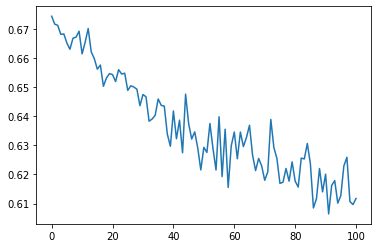

In [18]:
plt.plot(range(len(training_loss)), training_loss)
plt.show()